In [1]:
import os
os.chdir('..')

# Data Cleaning

In [2]:
from src.data.data_cleaning import DataCleaning

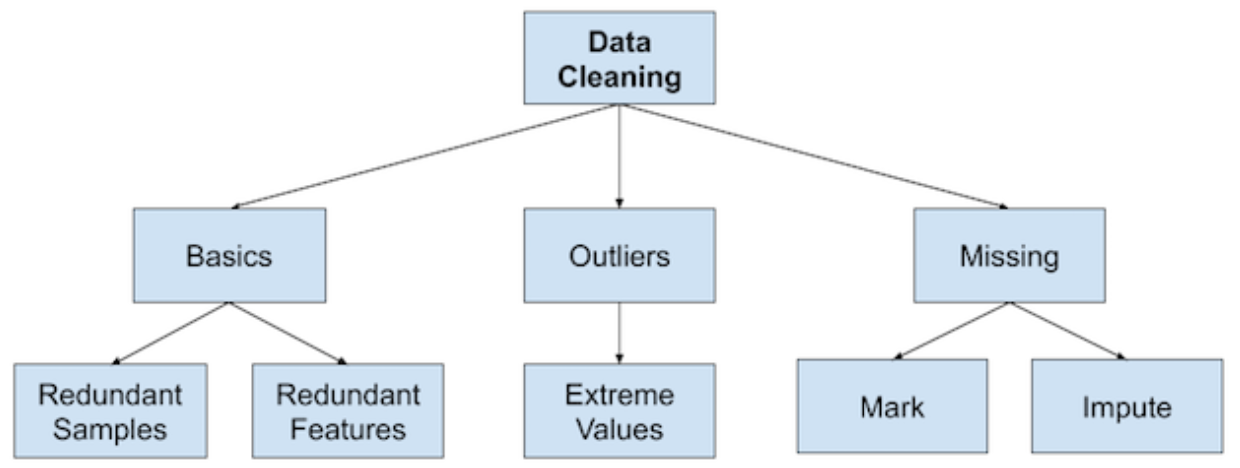

In [3]:
data_cleaning = DataCleaning(main_path="data/raw")

## Leads Dataframe

### Inspect Dataset


* Shape * (61639, 10)

* Dataframe visualization *

         Id       First Name          Use Case   Source     Status  \
0  23okrabh              NaN  Corporate Events  Inbound  Nurturing   
1       NaN  Taylor1 Harris1               NaN  Inbound  Discarded   
2  hbzt0kp1   Alex6 Jackson3               NaN  Inbound  Nurturing   
3  velluwdq  Bailey2 Taylor6  Corporate Events  Inbound  Discarded   
4       NaN    Drew5 Wilson5  Corporate Events  Inbound  Nurturing   

  Discarded/Nurturing Reason    Acquisition Campaign Created Date  Converted  \
0                    Not Fit                     NaN   2018-05-26          0   
1                Not feeling  Event Management Guide   2018-10-17          0   
2                 Competitor                     NaN   2019-03-29          0   
3                 Not Target                     NaN   2018-05-26          0   
4                 Competitor                     NaN   2018-10-17          0   

      City  
0  Chicago  
1   Denver  
2   De

/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

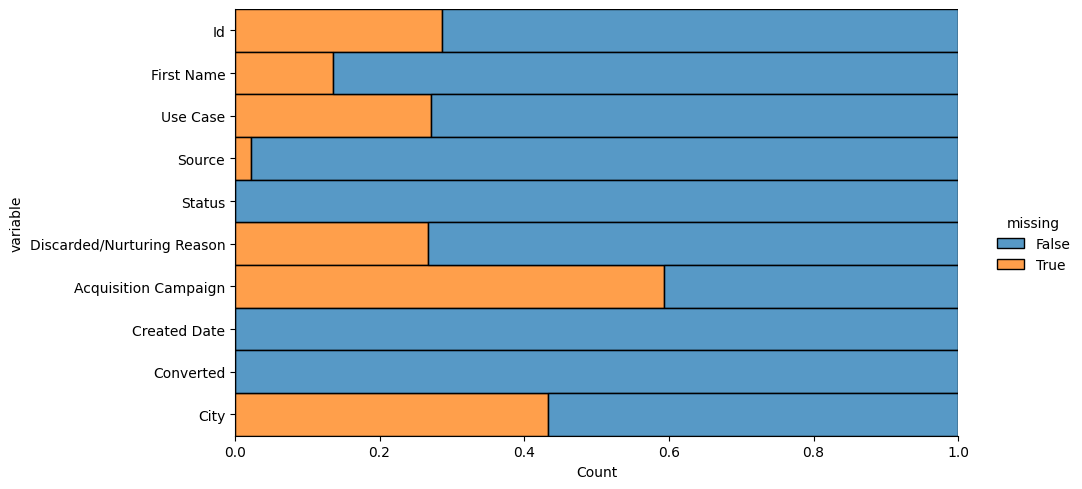

In [4]:
leads_df = data_cleaning.load_dataset(dataset_path="leads.csv")
data_cleaning.inspect_dataset(leads_df)

From the general analysis we've made we can observe:
* There are null values.
* Since the columns contain null values, their data types cannot be properly inferred. It is good practice to first address the cleanup and handling of null values before specifying the correct data type for each column.

### * Basics

Before proceeding, let's first analyze both redundant samples and redundant features.

In [5]:
# Reduntant Features
# When referring to "redundant features" or "redundant attributes" in the context of data analysis,
# it generally refers to columns that do not contribute useful information to the model because
# they have a single value or a high correlation with other columns.
counts = data_cleaning.identify_columns_with_single_value(leads_df)
leads_df = data_cleaning.delete_columns_with_single_value(leads_df, counts)


Column index - Number of unique values for each column.
Id                            43972
First Name                    53240
Use Case                          5
Source                            6
Status                           12
Discarded/Nurturing Reason       13
Acquisition Campaign             71
Created Date                    591
Converted                         2
City                             20
dtype: int64


Before removing columns - Shape: (61639, 10)

After removing columns - Shape: (61639, 10)



We can see that our dataset did not have any columns that had only one value

In [6]:
# Reduntant Samples
# When "redundant samples" or "redundant records" are mentioned in the context of data analysis,
# it generally refers to the presence of duplicate records in a data set.
data_cleaning.identify_row_with_duplicate_data(leads_df)
leads_df = data_cleaning.delete_row_with_duplicate_data(leads_df)


Are there duplicates?: True

        Id First Name          Use Case   Source     Status  \
34     NaN        NaN     Sports Events  Inbound  Discarded   
48     NaN        NaN     Sports Events  Inbound  Discarded   
99     NaN        NaN     Sports Events  Inbound  Discarded   
149    NaN        NaN     Sports Events  Inbound        New   
194    NaN        NaN     Sports Events  Inbound        New   
...    ...        ...               ...      ...        ...   
61429  NaN        NaN  Corporate Events  Inbound  Qualified   
61477  NaN        NaN     Sports Events  Inbound  Discarded   
61479  NaN        NaN     Sports Events  Inbound  Discarded   
61515  NaN        NaN     Sports Events  Inbound  Nurturing   
61631  NaN        NaN     Sports Events  Inbound        New   

      Discarded/Nurturing Reason Acquisition Campaign Created Date  Converted  \
34                    Not Target                  NaN   2018-10-17          0   
48                    Not Target                  N

We see that our dataset did contain duplicate records. This is partly because our ID column has null values.

For now, we will decide to remove these duplicate records.

Later, if necessary, we can reverse this action depending on the results.

### * Missing

The next step is to analyze our outliers. However, since our variables are not yet well typed, we are going to treat the null values, and then format them correctly to analyze the distribution of our data in detail.

In [7]:
# We are not interested in the names of potential customers
columns_to_drop = ["First Name"]
leads_df = data_cleaning.drop_columns(leads_df, columns_to_drop)

In [8]:
# We are not interested in records that do not have an ID
columns = ["Id"]
leads_df = data_cleaning.handle_missing_values(leads_df, columns, method="drop")

# Since variable 'Source' has so little null data and this is a categorical variable,
# we will replace its values with mode
columns = ["Source"]
leads_df = data_cleaning.handle_missing_values(leads_df, columns, method="mode")

In [9]:
# Group the data by multiple columns, calculate mode for each combination of values
# in these columns, and then use that mode to fill in the null values in target column within each combination
# of groups. This approach allows us to take advantage of the relationship between the target variable and
# multiple group variables to perform imputation.
group_columns = ["Source", "Status", "Converted"]
target_column = "Use Case"
leads_df = data_cleaning.impute_nulls_by_group_using_mode(leads_df, group_columns, target_column)

group_columns = ["Source", "Status", "Converted"]
target_column = "Discarded/Nurturing Reason"
leads_df = data_cleaning.impute_nulls_by_group_using_mode(leads_df, group_columns, target_column)

group_columns = ["Source", "Status", "Converted"]
target_column = "Acquisition Campaign"
leads_df = data_cleaning.impute_nulls_by_group_using_mode(leads_df, group_columns, target_column)

group_columns = ["Source", "Status", "Converted"]
target_column = "City"
leads_df = data_cleaning.impute_nulls_by_group_using_mode(leads_df, group_columns, target_column)

IndexError: single positional indexer is out-of-bounds

/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

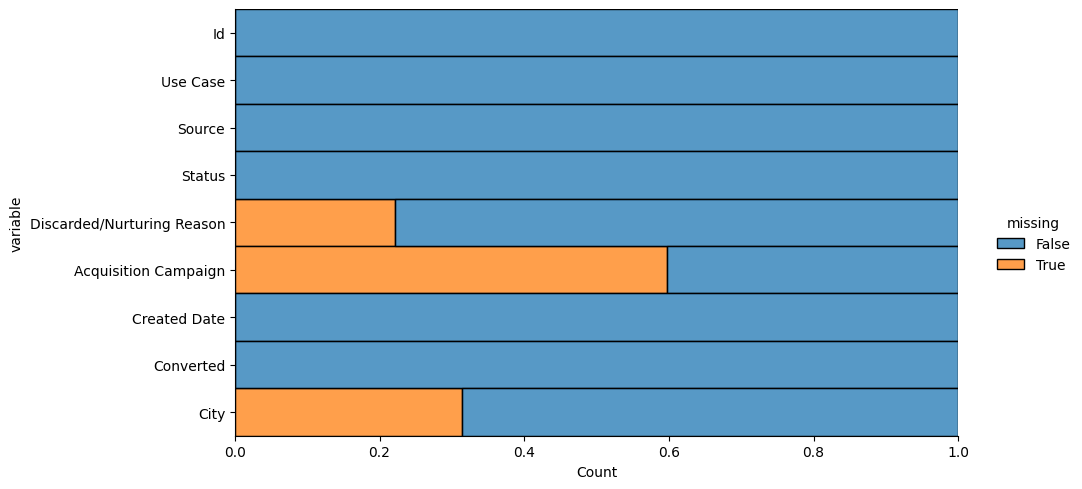

In [10]:
data_cleaning.visualize_proportion_null_values(leads_df)

# Offers Dataframe

### Inspect Dataset


* Shape * (6130, 9)

* Dataframe visualization *

         Id              Use Case       Status Created Date  Close Date  \
0  doqyhjtv  Educational Seminars   Closed Won   2019-11-17  2019-11-17   
1       NaN         Sports Events  Closed Lost   2019-11-24  2019-11-25   
2       NaN         Sports Events  Closed Lost   2019-11-24  2019-11-25   
3  cturqi48      Corporate Events   Closed Won   2019-05-07  2019-05-07   
4       NaN         Sports Events  Closed Lost   2019-11-17  2019-11-25   

   Price    Discount code               Pain  Loss Reason  
0  300.0       SAVEMORE50         operations          NaN  
1  150.0              NaN         operations        price  
2  768.0      HALFYEAR20G         operations  no response  
3  240.0  DISCOUNT50POWER  financial control          NaN  
4  240.0     SAVEMONTH50G  financial control  no response  

* Dataframe overview *

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6130 entries, 0 to 6129
Data columns (total 9 columns):
 #   Co

/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

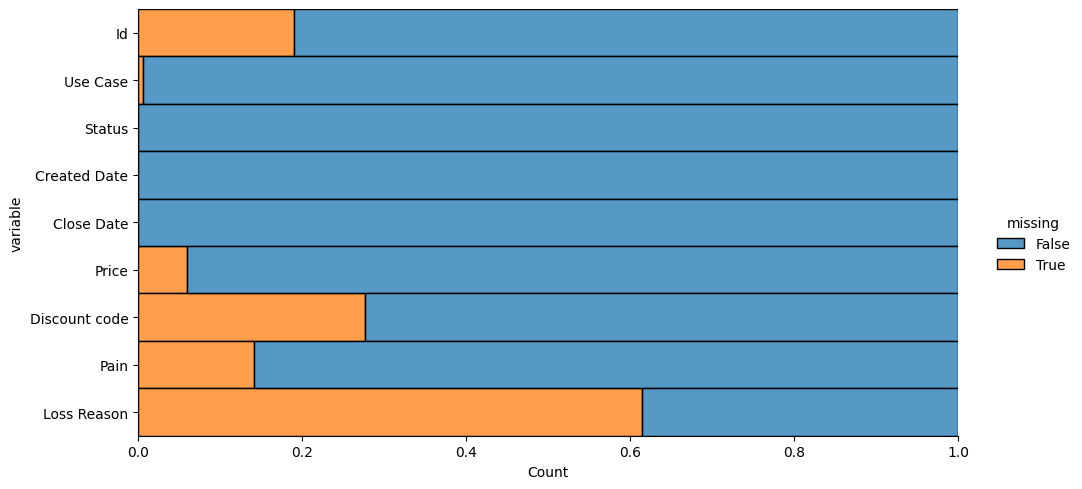

In [11]:
offers_df = data_cleaning.load_dataset(dataset_path="offers.csv")
data_cleaning.inspect_dataset(offers_df)

From the general analysis we've made we can observe:
* There are null values.
* Since the columns contain null values, their data types cannot be properly inferred. It is good practice to first address the cleanup and handling of null values before specifying the correct data type for each column.

### * Basics

Before proceeding, let's first analyze both redundant samples and redundant features.

In [12]:
# Reduntant Features
# When referring to "redundant features" or "redundant attributes" in the context of data analysis,
# it generally refers to columns that do not contribute useful information to the model because
# they have a single value or a high correlation with other columns.
counts = data_cleaning.identify_columns_with_single_value(offers_df)
offers_df = data_cleaning.delete_columns_with_single_value(offers_df, counts)


Column index - Number of unique values for each column.
Id               4924
Use Case            5
Status              6
Created Date      420
Close Date        440
Price              95
Discount code     112
Pain                4
Loss Reason         8
dtype: int64


Before removing columns - Shape: (6130, 9)

After removing columns - Shape: (6130, 9)



We can see that our dataset did not have any columns that had only one value

In [13]:
# Reduntant Samples
# When "redundant samples" or "redundant records" are mentioned in the context of data analysis,
# it generally refers to the presence of duplicate records in a data set.
data_cleaning.identify_row_with_duplicate_data(offers_df)
offers_df = data_cleaning.delete_row_with_duplicate_data(offers_df)


Are there duplicates?: True

       Id              Use Case       Status Created Date  Close Date  Price  \
286   NaN         Sports Events       Demo 1   2019-09-07  2020-01-26    NaN   
2503  NaN      Corporate Events   Closed Won   2019-11-05  2019-11-05  360.0   
2730  NaN      Corporate Events   Closed Won   2019-11-05  2019-11-05  360.0   
2789  NaN      Corporate Events   Closed Won   2019-06-05  2019-06-05  324.0   
2824  NaN      Corporate Events   Closed Won   2019-11-05  2019-11-05  360.0   
3093  NaN  Educational Seminars       Demo 1   2019-02-06  2020-01-26    NaN   
4075  NaN         Sports Events       Demo 1   2018-06-05  2018-06-05    NaN   
4968  NaN      Wedding Planning   Closed Won   2019-06-16  2019-06-16    NaN   
4984  NaN      Wedding Planning   Closed Won   2019-05-11  2019-05-11    NaN   
4985  NaN      Wedding Planning   Closed Won   2019-05-11  2019-05-11    NaN   
4986  NaN      Wedding Planning   Closed Won   2019-05-11  2019-05-11    NaN   
4987  NaN 

We see that our dataset did contain duplicate records. This is partly because our ID column has null values.

For now, we will decide to remove these duplicate records.

Later, if necessary, we can reverse this action depending on the results.

### * Missing

The next step is to analyze our outliers. However, since our variables are not yet well typed, we are going to treat the null values, and then format them correctly to analyze the distribution of our data in detail.

In [14]:
# We are not interested in records that do not have an ID
columns = ["Id"]
offers_df = data_cleaning.handle_missing_values(offers_df, columns, method="drop")

# Since variable 'Use Case' has so little null data and this is a categorical variable,
# we will replace its values with mode
columns = ["Use Case"]
offers_df = data_cleaning.handle_missing_values(offers_df, columns, method="mode")

/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carolinajimenez/Documents/DEVS/aidevs/mlenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

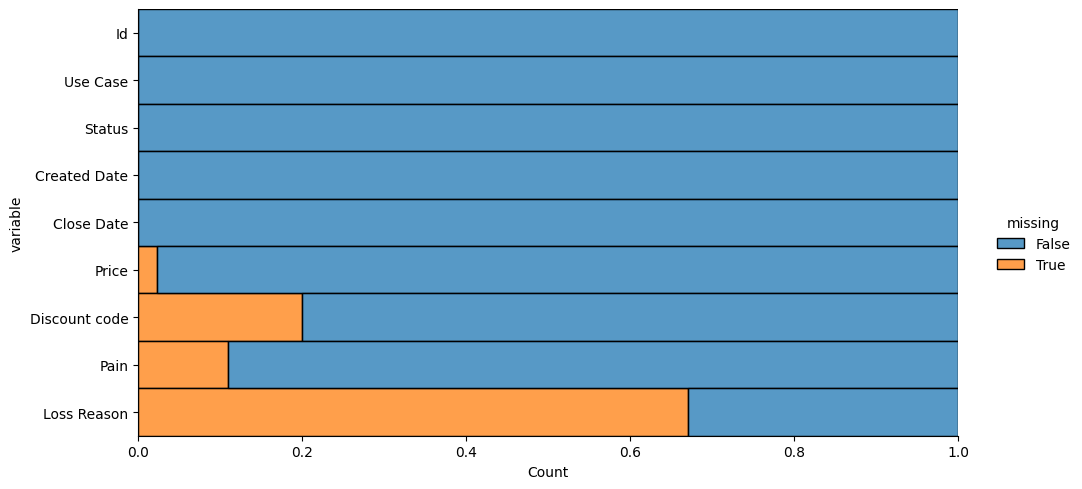

In [15]:
data_cleaning.visualize_proportion_null_values(offers_df)